In [1]:
#Libraries
import sklearn as sk
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, learning_curve, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sn
import tensorflow as tf
from tensorflow import keras

In [2]:
#Import datasets
df_churn = pd.read_csv("Customers_and_Churn.csv")


df_segm = pd.read_csv('Online_Retail.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})

In [3]:
# Preview the first 5 lines of the loaded data 
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Preview the first 5 lines of the loaded data 
df_segm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [5]:
#Shapes
print(df_churn.shape)
print(df_segm.shape)

(10000, 14)
(541909, 8)


In [6]:
#QuickEDA
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df_segm.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [8]:
df_pre_churn = df_churn.copy()

#Remove unnecessary data: RowNumber, Surname
df_pre_churn=df_pre_churn.drop(['RowNumber','Surname'],axis=1)

#Convert customerID into index
df_pre_churn = df_pre_churn.set_index('CustomerId')

#Split x and y
y=df_pre_churn['Exited']
x=df_pre_churn.drop(['Exited'],axis=1)

x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CustomerId,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
#Encode categorical variables
# Gender
le = preprocessing.LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CustomerId,,,,,,,,,,
15634602,619,France,0,42,2,0.00,1,1,1,101348.88
15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58
15619304,502,France,0,42,8,159660.80,3,1,0,113931.57
15701354,699,France,0,39,1,0.00,2,0,0,93826.63
15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [10]:
#Geography
ct = ColumnTransformer(transformers = [('encoder', preprocessing.OneHotEncoder(), [1])] , remainder = "passthrough")
x = np.array(ct.fit_transform(x))

In [11]:
#Splitting data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [12]:
#Scale to normalize
scaler = preprocessing.StandardScaler()
X_train[:, [3,5,6,7,8,11]] = scaler.fit_transform(X_train[:, [3,5,6,7,8,11]])
X_test[:, [3,5,6,7,8,11]] = scaler.transform(X_test[:, [3,5,6,7,8,11]])


In [14]:
# Decision Tree - No parameters
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
#standard sklearn function

DT = DecisionTreeClassifier()


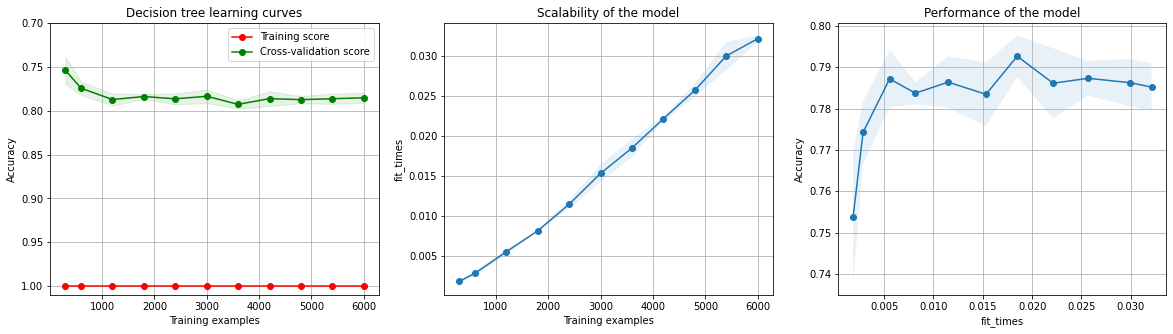

Accuracy: 0.802


In [15]:
#Learning curve
# from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Accuracy")
    axes[2].set_title("Performance of the model")

    return plt


g = plot_learning_curve(DT.fit(X_train, y_train), "Decision tree learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

DT_2 = DT.fit(X_train, y_train)
y_pred_sd = DT_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sd))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [16]:
print("Depth:",DT_2.get_depth())
print("Leaves:",DT_2.get_n_leaves())

Depth: 24
Leaves: 1106


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

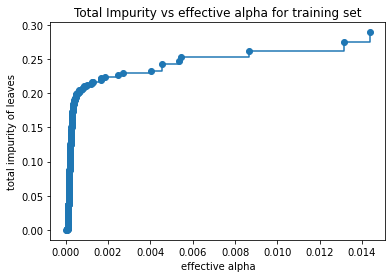

In [21]:
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    DT_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT_pruned.fit(X_train, y_train)
    clfs.append(DT_pruned)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.035070767514103096


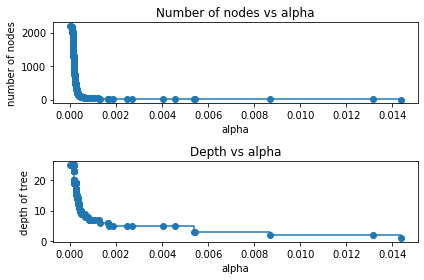

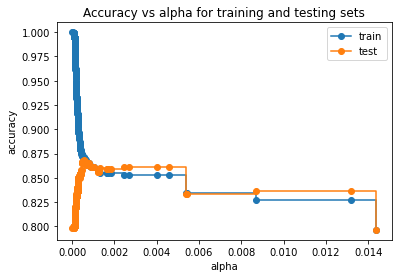

In [23]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [DT_pruned.tree_.node_count for DT_pruned in clfs]
depth = [DT_pruned.tree_.max_depth for DT_pruned in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


train_scores = [DT_pruned.score(X_train, y_train) for DT_pruned in clfs]
test_scores = [DT_pruned.score(X_test, y_test) for DT_pruned in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

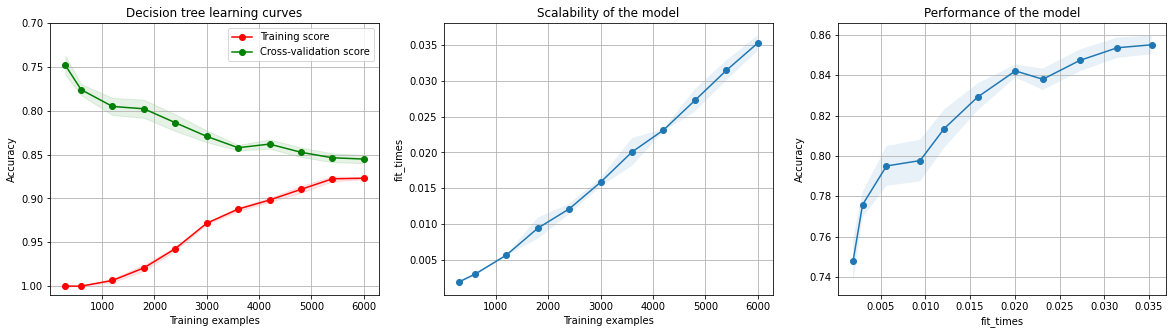

Accuracy: 0.8684


In [24]:
dt_prunned2 = DecisionTreeClassifier(ccp_alpha=0.00056).fit(X_train, y_train)

g2 = plot_learning_curve(dt_prunned2, "Decision tree learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

y_pred_pruned =dt_prunned2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_pruned))
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [25]:
print("Depth:",dt_prunned2.get_depth())
print("Leaves:",dt_prunned2.get_n_leaves())

Depth: 9
Leaves: 36


[[1715  276]
 [ 219  290]]


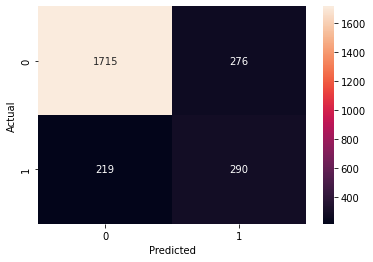

In [26]:
#Confusion Matrix - no prun
y_pred_m = DT.predict(X_test)
print(confusion_matrix(y_test,y_pred_m))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

[[1915   76]
 [ 253  256]]
1915 76 253 256


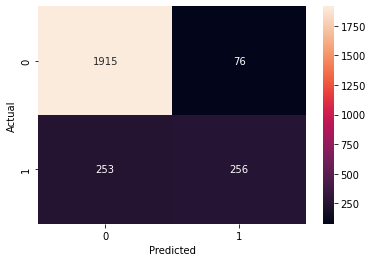

In [27]:
#Confusion Matrix - prun
y_pred_m_prunned = dt_prunned2.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_prunned))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_prunned).ravel()
print(tn, fp, fn, tp)

data2 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_prunned
        }

df2 = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])
confusion_matrix_df2 = pd.crosstab(df2['y_Actual'], df2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df2, annot=True, fmt="d")
plt.show()

In [30]:
##Neuronal Network
from sklearn.neural_network import MLPClassifier
#NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)


#Default
NN_d = MLPClassifier(max_iter=25)

NN_d.fit(X_train, y_train)
asd = NN_d.predict_proba(X_test[:1])
y_pred_NN_d = NN_d.predict(X_test)



#pipeNN = Pipeline(steps=[('dec_tree', DT)])
    
#criterion = ['gini', 'entropy']
#max_depth = [2,4,6,8,10,12]

#parameters = dict(dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

#clf_GS = GridSearchCV(pipe, parameters)
#clf_GS.fit(X_train, y_train)

#print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
#print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
#print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


#DT_GS = clf_GS.best_estimator_.get_params()['dec_tree']
#DT_GS.fit(X_train, y_train)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NN_d))
print(asd)
#cross_val_score(clf, iris.data, iris.target, cv=10)

 

Accuracy: 0.8596
[[0.70195156 0.29804844]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

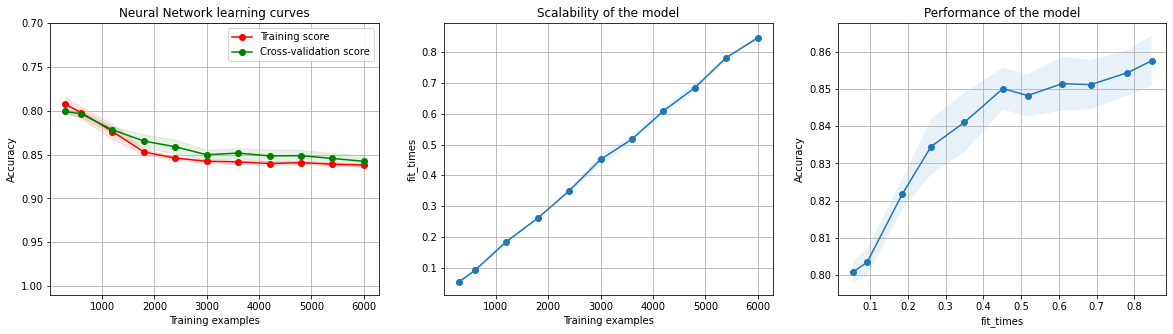

Accuracy: 0.858


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
g_NN_d = plot_learning_curve(NN_d.fit(X_train, y_train), "Neural Network learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

NN_d_2 = NN_d.fit(X_train, y_train)
y_pred_NN_d_2 = NN_d_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NN_d_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [32]:
# import model base and layers
#from keras.models import Sequential
#from keras.layers import Dense

#ann = tf.keras.models.Sequential()

#ann.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=12)) #first layer
#ann.add(tf.keras.layers.Dense(units=6, activation="relu")) #Second layer 
#ann.add(tf.keras.layers.Dense(units=6, activation="relu")) #Third layer
#ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) #Output layer

#ann.compile(optimizer="adam", loss= "binary_crossentropy", metrics= ["accuracy"])


#history = ann.fit(X_train, y_train, epochs=34, batch_size=1, validation_data=(X_test, y_test))


In [33]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test, y_pred_NN_d))

#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred_NN_d)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1991
           1       0.72      0.50      0.59       509

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.75      2500
weighted avg       0.85      0.86      0.85      2500



0.7268627290390255

In [34]:
#loss_train = history.history['loss']
#loss_val = history.history['val_loss']
#epochs = range(1,35)
#plt.plot(epochs, loss_train, 'g', label='Training loss')
#plt.plot(epochs, loss_val, 'b', label='validation loss')
#plt.title('Training and Validation loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

In [35]:
#loss_train = history.history['accuracy']
#loss_val = history.history['val_accuracy']
#epochs = range(1,35)
#plt.plot(epochs, loss_train, 'g', label='Training accuracy')
#plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#plt.title('Training and Validation accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

In [36]:
NN_GS = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.5],
    'learning_rate': ['constant','adaptive',]
    #'max_iter': [25,50,75,100,125,150,175,200],
}

NN_GSed = GridSearchCV(NN_GS, parameter_space, n_jobs=-1, cv=5)
NN_GSed.fit(X_train, y_train) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', NN_GSed.best_params_)
#DT_GS = clf_GS.best_estimator_.get_params()['dec_tree']
#DT_GS.fit(X_train, y_train)
#y_pred = DT_GS.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross_val_score(clf, iris.data, iris.target, cv=10)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


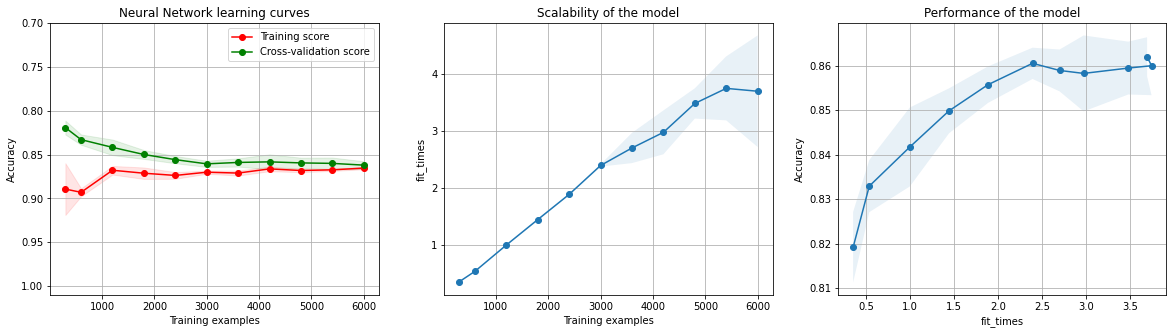

Accuracy: 0.8584


In [40]:
NN = MLPClassifier(activation= 'relu', alpha= 0.5, hidden_layer_sizes= (10, 30, 10), learning_rate= 'constant', solver= 'adam')

g_NN = plot_learning_curve(NN.fit(X_train, y_train), "Neural Network learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

NN_2 = NN.fit(X_train, y_train)
y_pred_NN_2 = NN_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NN_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [38]:
print(classification_report(y_test, y_pred_NN_2))

#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred_NN_2)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1991
           1       0.72      0.52      0.60       509

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



0.7344479430521829

[[1883  108]
 [ 247  262]]


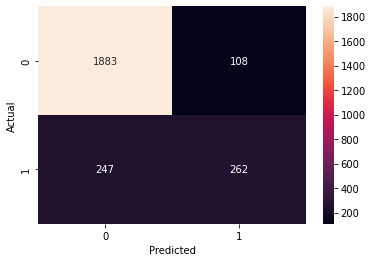

In [41]:
#Confusion Matrix - default
y_pred_m_NN_d = NN_d.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_NN_d))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_NN_d).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_NN_d
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

[[1880  111]
 [ 243  266]]


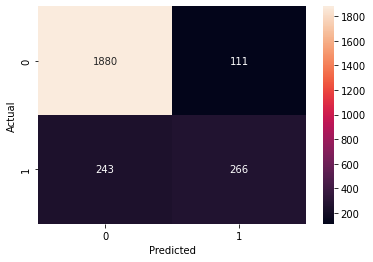

In [42]:
#Confusion Matrix - no default
y_pred_m_NN = NN_2.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_NN))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_NN).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_NN
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

In [47]:
##Boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
#X,Y = make_classification(n_samples=100, n_features=2, n_informative=2,
#                          n_redundant=0, n_repeated=0, random_state=102)
clf = AdaBoostClassifier(algorithm='SAMME')
#n_estimators=500, learning_rate=0.45, random_state=0, algorithm='SAMME')
Boost_d = clf.fit(X_train, y_train)
y_pred_Boost_d = Boost_d.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_Boost_d))

y_pred_Boost_d

Accuracy: 0.8548


array([0, 0, 0, ..., 0, 0, 0])

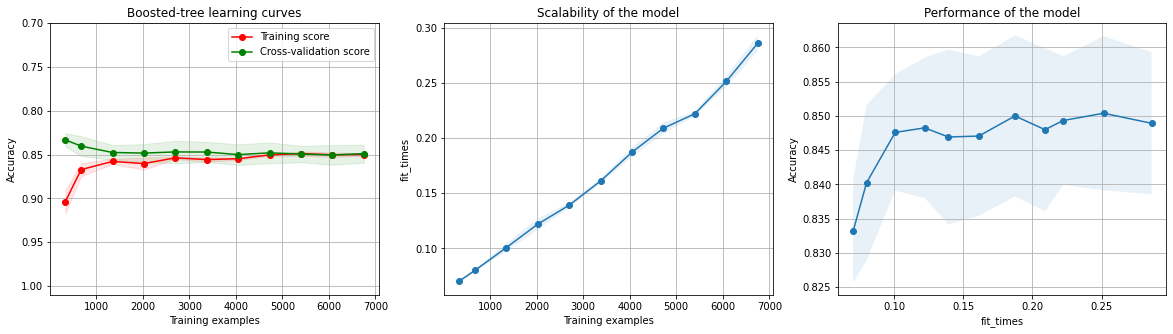

Accuracy: 0.8548


In [48]:
#Default
g_Boost_d = plot_learning_curve(clf.fit(X_train, y_train), "Boosted-tree learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 10, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

Boost_d_2 = clf.fit(X_train, y_train)
y_pred_Boost_d_2 = Boost_d_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_Boost_d_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [49]:
#boosting no default
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
#X,Y = make_classification(n_samples=100, n_features=2, n_informative=2,
#                          n_redundant=0, n_repeated=0, random_state=102)
clf_n = AdaBoostClassifier(n_estimators=500, learning_rate=0.45, random_state=0, algorithm='SAMME')
Boost = clf_n.fit(X_train, y_train)
y_pred_Boost = Boost.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_Boost))

y_pred_Boost

Accuracy: 0.8656


array([0, 0, 0, ..., 0, 0, 0])

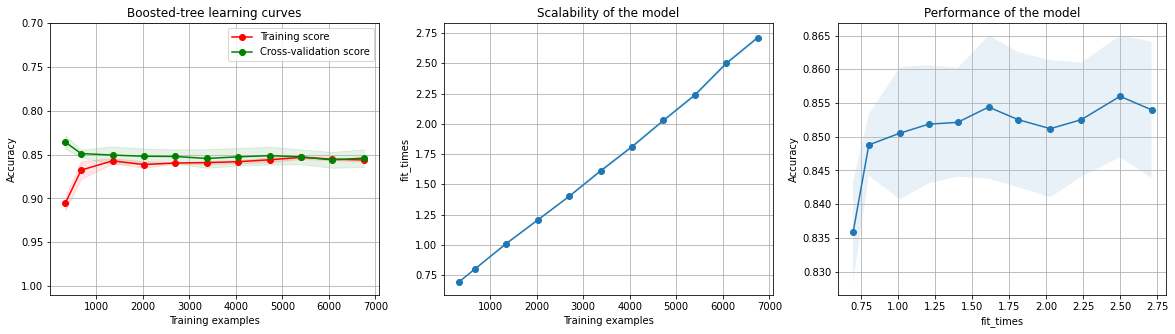

Accuracy: 0.8656


In [50]:
#no Default
g_Boost = plot_learning_curve(clf_n.fit(X_train, y_train), "Boosted-tree learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 10, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

Boost_2 = clf_n.fit(X_train, y_train)
y_pred_Boost_2 = Boost_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_Boost_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

[[1887  104]
 [ 259  250]]


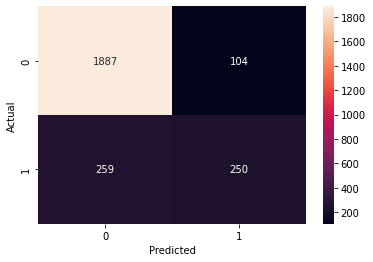

In [51]:
#Confusion Matrix - default
#y_pred_m_NN_d = NN_d.predict(X_test)
print(confusion_matrix(y_test,y_pred_Boost_d_2))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_Boost_d_2).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_Boost_d_2
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

[[1922   69]
 [ 267  242]]


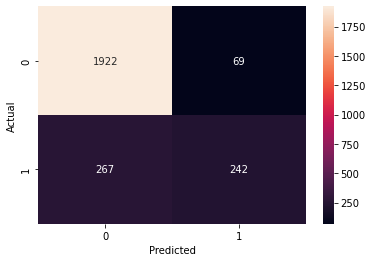

In [52]:
#Confusion Matrix - no default
#y_pred_m_NN_d = NN_d.predict(X_test)
print(confusion_matrix(y_test,y_pred_Boost_2))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_Boost_2).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_Boost_2
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

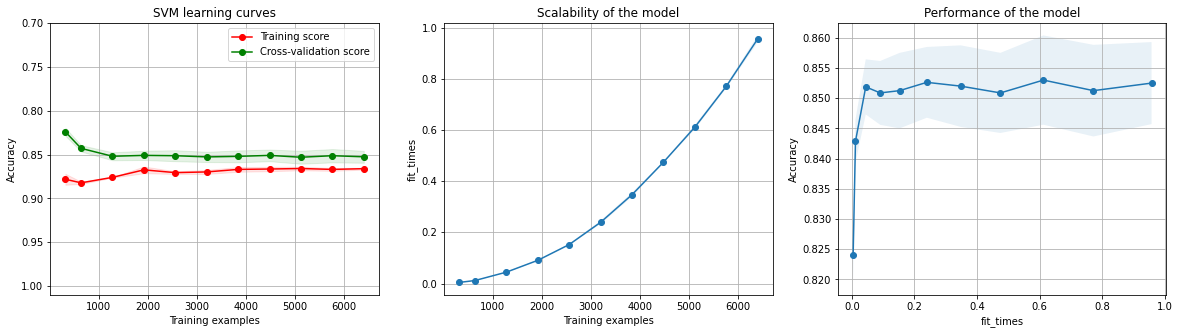

Accuracy: 0.867


In [ ]:
##SVM

from sklearn.svm import SVC
svm_d=SVC()
#svm_d.fit(x_train,y_train)
#pred_y_svm_d = svm_d.predict(x_test)
#score_4=accuracy_score(y_test,pred_4)
#list_scores.append(score_4)

g_svm_d = plot_learning_curve(svm_d.fit(X_train, y_train), "SVM learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

svm_d_2 = svm_d.fit(X_train, y_train)
y_pred_svm_d_2 = svm_d_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_d_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [ ]:
#GridSearch

SVM_GS = SVC()
params_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  


SVM_GSed = GridSearchCV(SVM_GS, params_svm, refit = True, verbose = 3)
SVM_GSed.fit(X_train, y_train) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', SVM_GSed.best_params_)
#DT_GS = clf_GS.best_estimator_.get_params()['dec_tree']
#DT_GS.fit(X_train, y_train)
#y_pred = DT_GS.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross_val_score(clf, iris.data, iris.target, cv=10)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.796, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.796, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.796, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.796, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.796, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.826, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.832, total=   1.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.817, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.827, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  5.0min finished


Best parameters found:
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


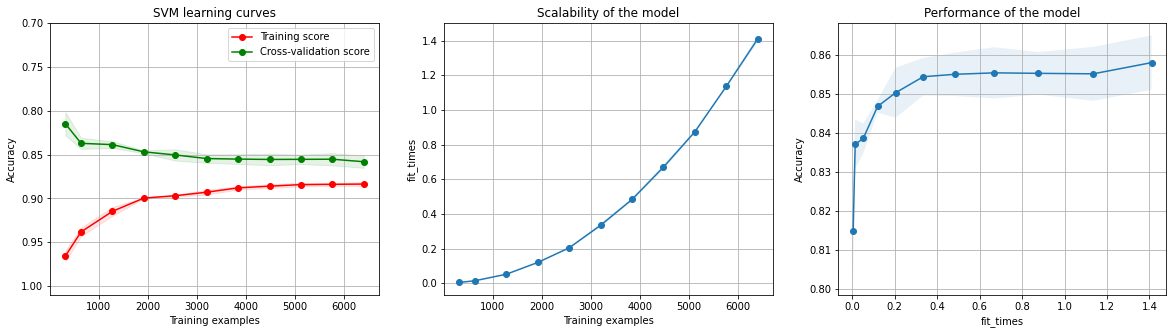

Accuracy: 0.8665


In [ ]:
#Parameters

svm=SVC(C=10, gamma=0.1, kernel= 'rbf')
#svm_d.fit(x_train,y_train)
#pred_y_svm_d = svm_d.predict(x_test)
#score_4=accuracy_score(y_test,pred_4)
#list_scores.append(score_4)

g_svm = plot_learning_curve(svm.fit(X_train, y_train), "SVM learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

svm_2 = svm.fit(X_train, y_train)
y_pred_svm_2 = svm_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

[[1550   45]
 [ 221  184]]


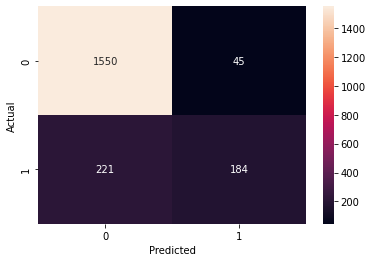

In [ ]:
#Confusion Matrix - default
y_pred_m_SVM_d = svm_d_2.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_SVM_d))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_SVM_d).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_SVM_d
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

[[1524   71]
 [ 196  209]]


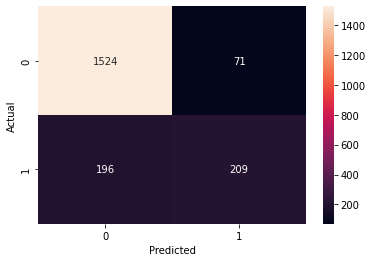

In [ ]:
#Confusion Matrix - parameters
y_pred_m_SVM = svm_2.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_SVM))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_SVM).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_SVM
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

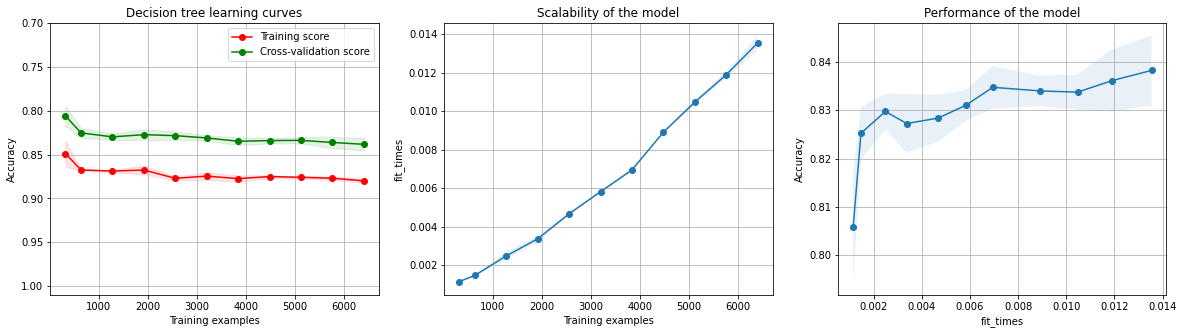

In [ ]:
##KNN

from sklearn.neighbors import KNeighborsClassifier

KNN_d=KNeighborsClassifier()


g_KNN_d = plot_learning_curve(KNN_d.fit(X_train, y_train), "Decision tree learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

In [ ]:
KNN_d_2 = KNN_d.fit(X_train, y_train)
y_pred_KNN_d_2 = KNN_d_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_KNN_d_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

Accuracy: 0.8365


In [ ]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test, y_pred_KNN_d_2))

#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred_KNN_d_2)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1595
           1       0.64      0.44      0.52       405

    accuracy                           0.84      2000
   macro avg       0.75      0.69      0.71      2000
weighted avg       0.82      0.84      0.82      2000



0.6893262123147181

In [ ]:
#GridSearch

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_GS = KNeighborsClassifier()
#Use GridSearch
knn_GSed = GridSearchCV(knn_GS, hyperparameters, cv=10)
#Fit the model
best_model = knn_GSed.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])




#print('Best parameters found:\n', SVM_GSed.best_params_)
#DT_GS = clf_GS.best_estimator_.get_params()['dec_tree']
#DT_GS.fit(X_train, y_train)
#y_pred = DT_GS.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross_val_score(clf, iris.data, iris.target, cv=10)

Best leaf_size: 1
Best p: 2
Best n_neighbors: 23


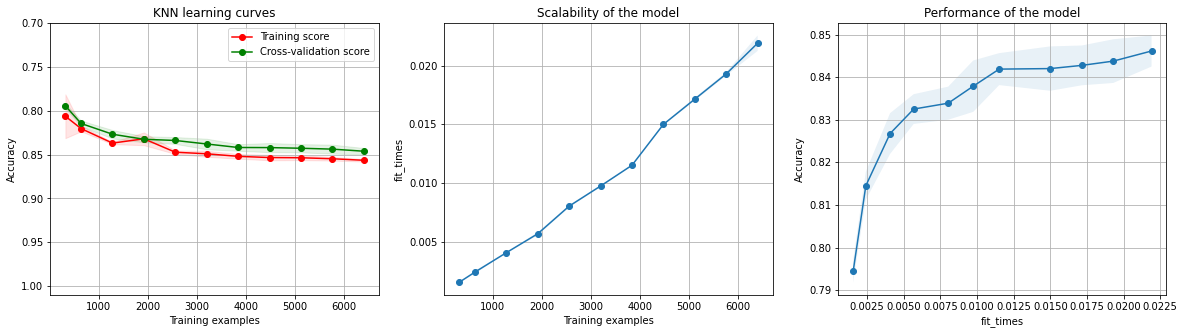

Accuracy: 0.856


In [ ]:
##parameters

KNN =KNeighborsClassifier(leaf_size = 1, p = 2, n_neighbors = 23)
#svm_d.fit(x_train,y_train)
#pred_y_svm_d = svm_d.predict(x_test)
#score_4=accuracy_score(y_test,pred_4)
#list_scores.append(score_4)

g_KNN = plot_learning_curve(KNN.fit(X_train, y_train), "KNN learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

KNN_2 = KNN.fit(X_train, y_train)
y_pred_KNN_2 = KNN_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_KNN_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [ ]:

print(classification_report(y_test, y_pred_KNN_2))

#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred_KNN_2)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.75      0.43      0.55       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



0.696946476256821

In [ ]:
from sklearn.model_selection import ShuffleSplit
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (KNN - default)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (KNN - GS)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(leaf_size = 1, p = 2, n_neighbors = 23)
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
#Confusion Matrix - default
KNN_d_2 = KNN_d.fit(X_train, y_train)
y_pred_m_KNN_d = KNN_d_2.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_KNN_d))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_KNN_d).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_KNN_d
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

In [ ]:
#Confusion Matrix - parameters
y_pred_m_KNN = KNN_2.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_KNN))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_KNN).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_KNN
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()